NameError: name 'y_test' is not defined

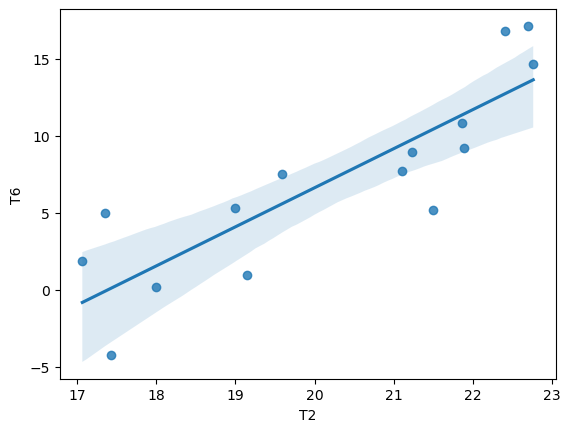

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('energydata_complete.csv')
#rename columns
column_names = {'X1':'Date', 'X2': 'Appliances',
'X3': 'lights', 'X4': 'T1', 'X5': 'RH_1',
'X6': 'T2', 'X7': 'RH_2',
'X8': 'T3','X9': 'RH_3','X10': 'T4',
'X11': 'RH_4','X12': 'T5','X13': 'RH_5','X14': 'T6','X15': 'RH_6',
'Y1': 'rv1', 'Y2': 'rv2'}
df = df.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)
#regression plot
sns.regplot(x="T2", y="T6",
data=simple_linear_reg_df)


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), 
columns=df.columns)
features_df = normalised_df.drop(columns=['T2'])
heating_target = normalised_df['T2']
#Now, we split our dataset into the training and testing dataset. Recall 
#that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, 
heating_target,
test_size=0.3, random_state=1)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 



0.329

In [29]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

31.762

In [30]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

31.762

In [31]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.371

In [32]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

-0.024